In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Đọc dữ liệu
file_path = "10kmau2016.csv" 
df = pd.read_csv(file_path)

# Hiển thị thông tin cơ bản
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9189 entries, 0 to 9188
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ttnt             9189 non-null   int64  
 1   dantoc           9189 non-null   int64  
 2   tsnguoi          9189 non-null   int64  
 3   thunhap          9189 non-null   int64  
 4   chitieu          9189 non-null   float64
 5   chichonangluong  9189 non-null   int64  
 6   chitiendien      9189 non-null   int64  
 7   dienticho        9189 non-null   int64  
 8   chatluongnhao    9189 non-null   int64  
 9   tiepcandienluoi  9189 non-null   int64  
 10  chitiendienbq    9189 non-null   float64
 11  thu nhapbq       9189 non-null   float64
 12  chinangluongbq   9189 non-null   float64
 13  chitieubq        9189 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 1005.2 KB


,ttnt,dantoc,tsnguoi,thunhap,chitieu,chichonangluong,chitiendien,dienticho,chatluongnhao,tiepcandienluoi,chitiendienbq,thu nhapbq,chinangluongbq,chitieubq
0,1,1,1,163900,18318.0,10965,6000,150,3,1,6000.0,163900.0,10965.0,18318.00
1,1,1,5,579280,55620.0,32010,8200,100,3,1,1640.0,115856.0,6402.0,11124.00
2,1,1,2,350330,10206.0,9280,1100,140,1,1,550.0,175165.0,4640.0,5103.00
3,1,1,4,165210,22651.0,22400,6750,85,1,1,1687.5,41302.5,5600.0,5662.75
4,1,1,1,273500,31903.0,12126,8526,200,3,1,8526.0,273500.0,12126.0,31903.00


In [5]:
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu trong từng cột:\n", missing_values)

Số lượng giá trị thiếu trong từng cột:
 ttnt               0
dantoc             0
tsnguoi            0
thunhap            0
chitieu            0
chichonangluong    0
chitiendien        0
dienticho          0
chatluongnhao      0
tiepcandienluoi    0
chitiendienbq      0
thu nhapbq         0
chinangluongbq     0
chitieubq          0
dtype: int64


In [9]:
# Chọn các biến quan trọng để phân cụm
features = ['chichonangluong', 'chitiendien', 'tiepcandienluoi', 'chitiendienbq', 
            'chinangluongbq', 'thunhap', 'thu nhapbq', 'tsnguoi', 'ttnt', 'dantoc', 'dienticho']

# Áp dụng Min-Max Scaling để chuẩn hóa dữ liệu
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Hiển thị dữ liệu đã chuẩn hóa
df_scaled.head()

,chichonangluong,chitiendien,tiepcandienluoi,chitiendienbq,chinangluongbq,thunhap,thu nhapbq,tsnguoi,ttnt,dantoc,dienticho
0,0.136261,0.076923,1.0,0.250000,0.421374,0.034639,0.139828,0.000000,1.0,1.0,0.194631
1,0.399225,0.105128,1.0,0.068333,0.245882,0.123933,0.098492,0.333333,1.0,1.0,0.127517
2,0.115207,0.014103,1.0,0.022917,0.178116,0.074716,0.149520,0.083333,1.0,1.0,0.181208
3,0.279145,0.086538,1.0,0.070312,0.215038,0.034921,0.034347,0.250000,1.0,1.0,0.107383
4,0.150768,0.109308,1.0,0.355250,0.466026,0.058200,0.234126,0.000000,1.0,1.0,0.261745


In [11]:
pca = PCA(n_components=0.95)  
df_pca = pca.fit_transform(df_scaled)

num_components = df_pca.shape[1]
print(f"Số thành phần PCA giữ lại: {num_components}")

Số thành phần PCA giữ lại: 4


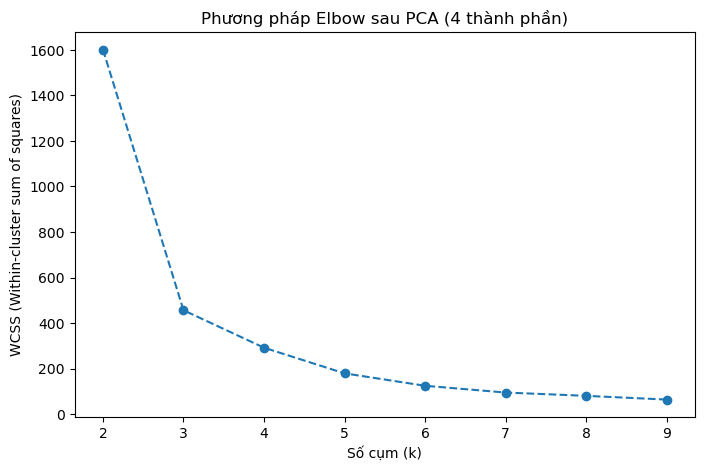

In [13]:
wcss_pca = []
K_range = range(2, 10)

for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_pca.fit(df_pca)
    wcss_pca.append(kmeans_pca.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss_pca, marker='o', linestyle='--')
plt.xlabel("Số cụm (k)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title(f"Phương pháp Elbow sau PCA ({num_components} thành phần)")
plt.show()

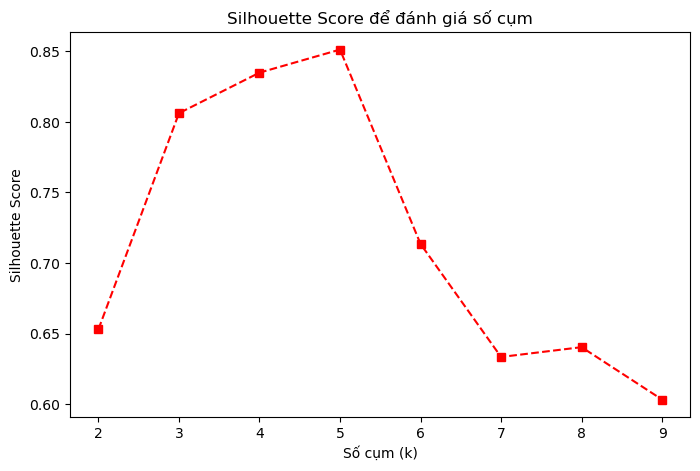

In [15]:
silhouette_scores = []
for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_pca = kmeans_pca.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels_pca))

# Vẽ biểu đồ Silhouette Score để đánh giá số cụm
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score để đánh giá số cụm")
plt.show()

In [17]:
# Chọn số cụm tối ưu từ Elbow Method và Silhouette Score
optimal_k_pca = 3
kmeans_final = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
df_scaled["Cluster_PCA"] = kmeans_final.fit_predict(df_pca)

# Thống kê số lượng hộ gia đình trong từng cụm
print("Số lượng hộ gia đình trong từng cụm:")
print(df_scaled["Cluster_PCA"].value_counts())

Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
1    4993
0    2563
2    1633
Name: count, dtype: int64


In [19]:
# Ghép lại với dữ liệu gốc để phân tích
df['Cluster_PCA'] = df_scaled["Cluster_PCA"]

# Trung bình các biến trong từng cụm
cluster_summary = df.groupby("Cluster_PCA")[features].mean()
print("Trung bình các biến theo từng cụm:")
print(cluster_summary)

Trung bình các biến theo từng cụm:
             chichonangluong  chitiendien  tiepcandienluoi  chitiendienbq  \
Cluster_PCA                                                                 
0                6158.036286  4756.092860         0.999220    1360.364287   
1                3480.994192  2613.038254         0.997396     773.171464   
2                2142.681568  1425.884874         0.925903     385.671464   

             chinangluongbq        thunhap    thu nhapbq   tsnguoi      ttnt  \
Cluster_PCA                                                                    
0               1750.476760  181139.522435  50218.642318  3.763948  1.000000   
1               1018.115357  115620.182656  32658.235019  3.653114  0.000000   
2                568.006345   76030.054501  19549.040460  4.351500  0.112064   

             dantoc  dienticho  
Cluster_PCA                     
0               1.0  97.016777  
1               1.0  82.045063  
2               0.0  69.550521  


Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
0    2563
1    4993
2    1633
Name: count, dtype: int64


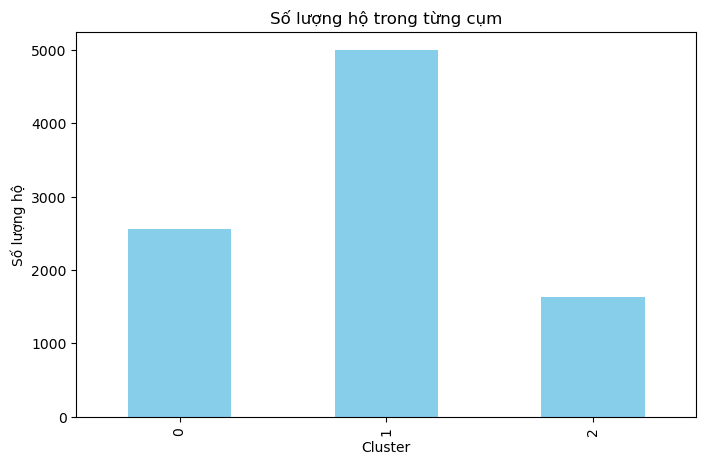

In [21]:
# Thống kê số lượng hộ gia đình trong từng cụm
cluster_counts = df['Cluster_PCA'].value_counts().sort_index()

print("Số lượng hộ gia đình trong từng cụm:")
print(cluster_counts)

# Vẽ biểu đồ số lượng hộ trong từng cụm
plt.figure(figsize=(8,5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Số lượng hộ")
plt.title("Số lượng hộ trong từng cụm")
plt.show()

Đặc điểm kinh tế của từng cụm:
                   thunhap    thu nhapbq       chitieu    chitieubq
Cluster_PCA                                                        
0            181139.522435  50218.642318  29002.736403  9342.121768
1            115620.182656  32658.235019  19555.012978  6538.526415
2             76030.054501  19549.040460  16615.674954  4626.743075


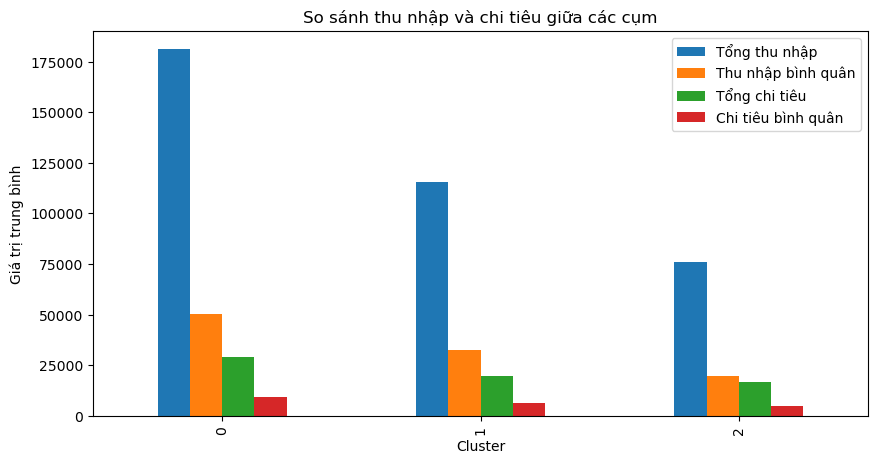

In [25]:
# Tính thu nhập và chi tiêu trung bình trong từng cụm
economic_summary = df.groupby("Cluster_PCA")[['thunhap', 'thu nhapbq', 'chitieu', 'chitieubq']].mean()

print("Đặc điểm kinh tế của từng cụm:")
print(economic_summary)

# Vẽ biểu đồ so sánh thu nhập và chi tiêu trung bình giữa các cụm
economic_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh thu nhập và chi tiêu giữa các cụm")
plt.legend(["Tổng thu nhập", "Thu nhập bình quân", "Tổng chi tiêu", "Chi tiêu bình quân"])
plt.show()

Mức tiêu thụ năng lượng trong từng cụm:
             chichonangluong  chinangluongbq  chitiendien  chitiendienbq
Cluster_PCA                                                             
0                6158.036286     1750.476760  4756.092860    1360.364287
1                3480.994192     1018.115357  2613.038254     773.171464
2                2142.681568      568.006345  1425.884874     385.671464


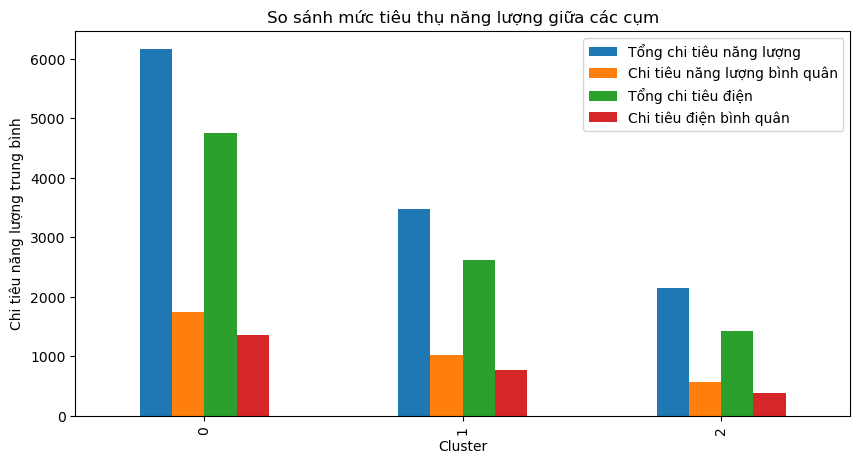

In [27]:
# Tính mức tiêu thụ năng lượng trung bình trong từng cụm
energy_summary = df.groupby("Cluster_PCA")[['chichonangluong', 'chinangluongbq', 'chitiendien', 'chitiendienbq']].mean()

print("Mức tiêu thụ năng lượng trong từng cụm:")
print(energy_summary)

# Vẽ biểu đồ so sánh tiêu thụ năng lượng giữa các cụm
energy_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Chi tiêu năng lượng trung bình")
plt.title("So sánh mức tiêu thụ năng lượng giữa các cụm")
plt.legend(["Tổng chi tiêu năng lượng", "Chi tiêu năng lượng bình quân", "Tổng chi tiêu điện", "Chi tiêu điện bình quân"])
plt.show()

Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):
Cluster_PCA
0    99.921966
1    99.739635
2    92.590325
Name: tiepcandienluoi, dtype: float64


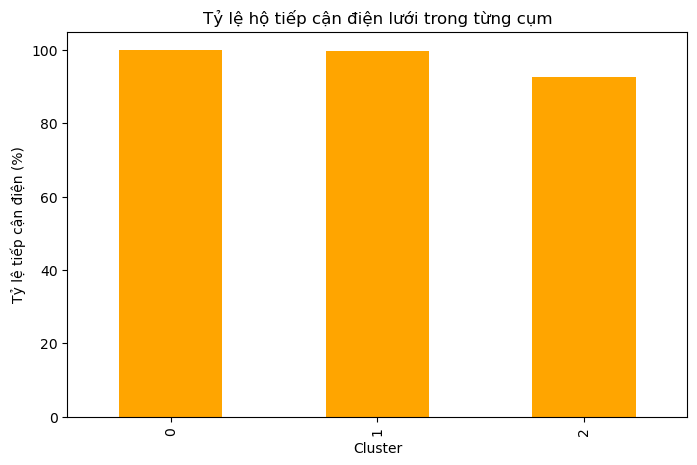

In [29]:
# Tính tỷ lệ hộ có tiếp cận điện lưới trong từng cụm
electricity_access = df.groupby("Cluster_PCA")["tiepcandienluoi"].mean() * 100

print("Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):")
print(electricity_access)

# Vẽ biểu đồ tỷ lệ tiếp cận điện lưới
plt.figure(figsize=(8,5))
electricity_access.plot(kind="bar", color="orange")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ tiếp cận điện (%)")
plt.title("Tỷ lệ hộ tiếp cận điện lưới trong từng cụm")
plt.show()

Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):
Cluster_PCA
0      0.0
1      0.0
2    100.0
Name: dantoc, dtype: float64

Tỷ lệ hộ nông thôn trong từng cụm (%):
Cluster_PCA
0      0.000000
1    100.000000
2     88.793631
Name: ttnt, dtype: float64


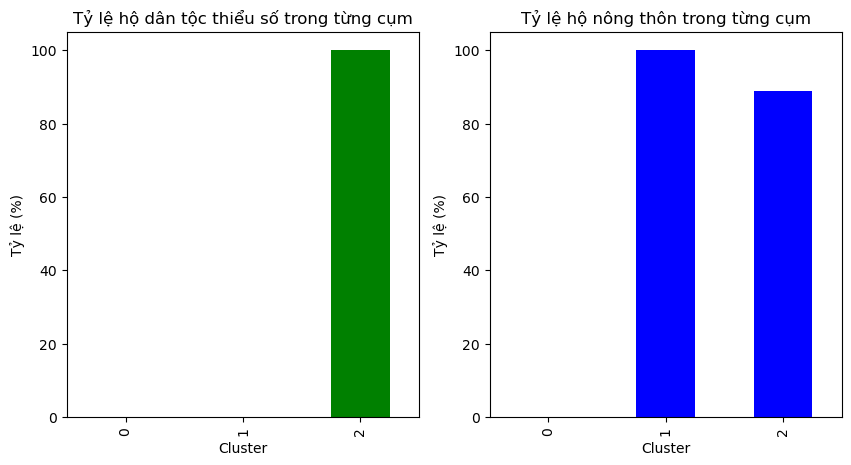

In [31]:
# Tính tỷ lệ hộ dân tộc thiểu số và hộ nông thôn trong từng cụm
ethnic_ratio = df.groupby("Cluster_PCA")["dantoc"].apply(lambda x: (x == 0).mean() * 100)
rural_ratio = df.groupby("Cluster_PCA")["ttnt"].apply(lambda x: (x == 0).mean() * 100)

print("Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):")
print(ethnic_ratio)

print("\nTỷ lệ hộ nông thôn trong từng cụm (%):")
print(rural_ratio)

# Vẽ biểu đồ
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
ethnic_ratio.plot(kind="bar", color="green")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ dân tộc thiểu số trong từng cụm")

plt.subplot(1, 2, 2)
rural_ratio.plot(kind="bar", color="blue")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ nông thôn trong từng cụm")

plt.show()

Đặc điểm hộ gia đình trong từng cụm:
              tsnguoi  dienticho
Cluster_PCA                     
0            3.763948  97.016777
1            3.653114  82.045063
2            4.351500  69.550521


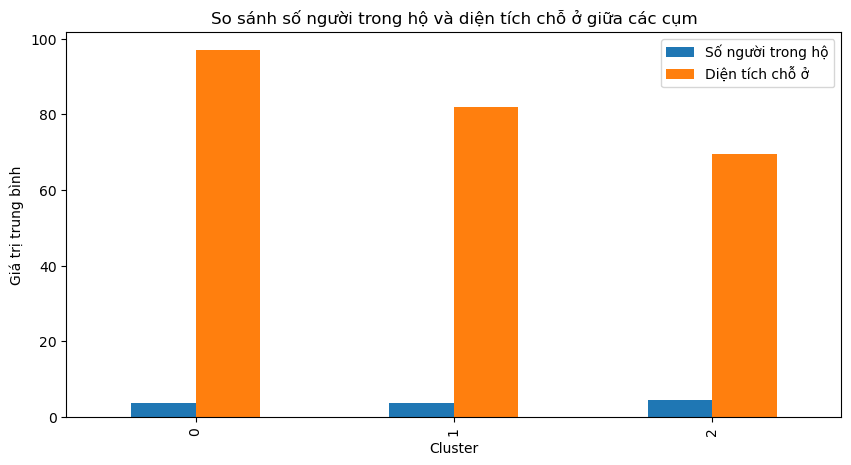

In [33]:
# Tính số người trung bình trong hộ và diện tích chỗ ở trong từng cụm
household_summary = df.groupby("Cluster_PCA")[['tsnguoi', 'dienticho']].mean()

print("Đặc điểm hộ gia đình trong từng cụm:")
print(household_summary)

# Vẽ biểu đồ so sánh đặc điểm hộ gia đình giữa các cụm
household_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh số người trong hộ và diện tích chỗ ở giữa các cụm")
plt.legend(["Số người trong hộ", "Diện tích chỗ ở"])
plt.show()